## Property Prices in San Francisco

* Determine variation in property prices by Supervisor District

* Any correlation between prices and police/fire/311 activity


In [438]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import datetime
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]


pd.options.display.float_format = '{0:,.2f}'.format
pd.set_option('display.max_columns', 500)

# File to Load 
tax_data_to_load = "Resources/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"

# Read Secured Property Tax Rolls - Data is not very clean - Define all data type for faster processing
crime_data = pd.read_csv(tax_data_to_load,
 dtype={
 "IncidntNum" : object,
"Category" : object,
"Descript" : object,
"DayOfWeek" : object,
"Date" : object,
"Time" : object,
"PdDistrict" : object,
"Resolution" : object,
"AddressX" : object,
"AddressY" : object,
"Location" : object,
"PdId" : object,
"SF Find Neighborhoods" : object,
"Current Police Districts" : object,
"Current Supervisor Districts" : object,
"Analysis Neighborhoods" : object})


In [439]:
# View the data

crime_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,:@computed_region_yftq_j783,:@computed_region_p5aj_wyqh,:@computed_region_rxqg_mtj9,:@computed_region_bh8s_q3mv,:@computed_region_fyvs_ahh9,:@computed_region_9dfj_4gjx,:@computed_region_n4xg_c4py,:@computed_region_4isq_27mq,:@computed_region_fcz8_est8,:@computed_region_pigm_ib2e,:@computed_region_9jxd_iqea,:@computed_region_6pnf_4xz7,:@computed_region_6ezc_tdp2,:@computed_region_h4ep_8xdi,:@computed_region_nqbw_i6c3,:@computed_region_2dwj_jsy4
0,180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,05/15/2018,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.41,37.78,"(37.77520656149669, -122.41191202732877)",18036228907023,32,1,10,34,8.00,2.00,9.00,"28,853",34.00,nan,1.00,nan,1.00,nan,nan,2.00,nan,nan,1.00,nan
1,180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,05/15/2018,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.42,37.78,"(37.77514629165388, -122.41925789481357)",18036094864020,32,1,10,20,8.00,2.00,9.00,"28,853",19.00,nan,1.00,nan,1.00,nan,8.00,2.00,1.00,1.00,1.00,nan
2,180360879,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.42,37.76,"(37.757100579642824, -122.41781255878655)",18036087926150,53,3,2,20,2.00,4.00,7.00,"28,859",19.00,13.00,nan,15.00,3.00,15.00,nan,2.00,nan,nan,3.00,nan
3,180360879,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.42,37.76,"(37.757100579642824, -122.41781255878655)",18036087965010,53,3,2,20,2.00,4.00,7.00,"28,859",19.00,13.00,nan,15.00,3.00,15.00,nan,2.00,nan,nan,3.00,nan
4,180360879,OTHER OFFENSES,TRAFFIC VIOLATION,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.42,37.76,"(37.757100579642824, -122.41781255878655)",18036087965015,53,3,2,20,2.00,4.00,7.00,"28,859",19.00,13.00,nan,15.00,3.00,15.00,nan,2.00,nan,nan,3.00,nan


In [440]:
crime_data.columns = crime_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
crime_data.head()

,incidntnum,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location,pdid,sf_find_neighborhoods,current_police_districts,current_supervisor_districts,analysis_neighborhoods,:@computed_region_yftq_j783,:@computed_region_p5aj_wyqh,:@computed_region_rxqg_mtj9,:@computed_region_bh8s_q3mv,:@computed_region_fyvs_ahh9,:@computed_region_9dfj_4gjx,:@computed_region_n4xg_c4py,:@computed_region_4isq_27mq,:@computed_region_fcz8_est8,:@computed_region_pigm_ib2e,:@computed_region_9jxd_iqea,:@computed_region_6pnf_4xz7,:@computed_region_6ezc_tdp2,:@computed_region_h4ep_8xdi,:@computed_region_nqbw_i6c3,:@computed_region_2dwj_jsy4
0,180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,05/15/2018,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.41,37.78,"(37.77520656149669, -122.41191202732877)",18036228907023,32,1,10,34,8.00,2.00,9.00,"28,853",34.00,nan,1.00,nan,1.00,nan,nan,2.00,nan,nan,1.00,nan
1,180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,05/15/2018,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.42,37.78,"(37.77514629165388, -122.41925789481357)",18036094864020,32,1,10,20,8.00,2.00,9.00,"28,853",19.00,nan,1.00,nan,1.00,nan,8.00,2.00,1.00,1.00,1.00,nan
2,180360879,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.42,37.76,"(37.757100579642824, -122.41781255878655)",18036087926150,53,3,2,20,2.00,4.00,7.00,"28,859",19.00,13.00,nan,15.00,3.00,15.00,nan,2.00,nan,nan,3.00,nan
3,180360879,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.42,37.76,"(37.757100579642824, -122.41781255878655)",18036087965010,53,3,2,20,2.00,4.00,7.00,"28,859",19.00,13.00,nan,15.00,3.00,15.00,nan,2.00,nan,nan,3.00,nan
4,180360879,OTHER OFFENSES,TRAFFIC VIOLATION,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.42,37.76,"(37.757100579642824, -122.41781255878655)",18036087965015,53,3,2,20,2.00,4.00,7.00,"28,859",19.00,13.00,nan,15.00,3.00,15.00,nan,2.00,nan,nan,3.00,nan


In [441]:
#Analyze data - Get all possible values for Supervisor Districts
#crime_data[current_supervisor_districts].unique()
#crime_data['disticfdisc'].nunique()
crime_data.current_supervisor_districts.unique()


array(['10', '2', '11', '5', '4', '6', '9', '3', '7', '8', '1', nan],
      dtype=object)

In [442]:
crime_data['date'].unique()

array(['05/15/2018', '05/14/2018', '05/13/2018', ..., '01/03/2003',
       '01/02/2003', '01/01/2003'], dtype=object)

In [443]:
crime_data.pddistrict.unique()

array(['SOUTHERN', 'MISSION', 'PARK', 'TENDERLOIN', 'RICHMOND', 'BAYVIEW',
       'NORTHERN', 'CENTRAL', 'TARAVAL', 'INGLESIDE', nan], dtype=object)

In [444]:
crime_data['date'] = pd.to_datetime(crime_data['date'], format = '%m/%d/%Y')

In [445]:
crime_data['date'].dt.year
crime_data['year'] = crime_data['date'].dt.year
crime_data.head()


,incidntnum,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location,pdid,sf_find_neighborhoods,current_police_districts,current_supervisor_districts,analysis_neighborhoods,:@computed_region_yftq_j783,:@computed_region_p5aj_wyqh,:@computed_region_rxqg_mtj9,:@computed_region_bh8s_q3mv,:@computed_region_fyvs_ahh9,:@computed_region_9dfj_4gjx,:@computed_region_n4xg_c4py,:@computed_region_4isq_27mq,:@computed_region_fcz8_est8,:@computed_region_pigm_ib2e,:@computed_region_9jxd_iqea,:@computed_region_6pnf_4xz7,:@computed_region_6ezc_tdp2,:@computed_region_h4ep_8xdi,:@computed_region_nqbw_i6c3,:@computed_region_2dwj_jsy4,year
0,180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,2018-05-15,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.41,37.78,"(37.77520656149669, -122.41191202732877)",18036228907023,32,1,10,34,8.00,2.00,9.00,"28,853",34.00,nan,1.00,nan,1.00,nan,nan,2.00,nan,nan,1.00,nan,2018
1,180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,2018-05-15,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.42,37.78,"(37.77514629165388, -122.41925789481357)",18036094864020,32,1,10,20,8.00,2.00,9.00,"28,853",19.00,nan,1.00,nan,1.00,nan,8.00,2.00,1.00,1.00,1.00,nan,2018
2,180360879,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,2018-05-15,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.42,37.76,"(37.757100579642824, -122.41781255878655)",18036087926150,53,3,2,20,2.00,4.00,7.00,"28,859",19.00,13.00,nan,15.00,3.00,15.00,nan,2.00,nan,nan,3.00,nan,2018
3,180360879,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,2018-05-15,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.42,37.76,"(37.757100579642824, -122.41781255878655)",18036087965010,53,3,2,20,2.00,4.00,7.00,"28,859",19.00,13.00,nan,15.00,3.00,15.00,nan,2.00,nan,nan,3.00,nan,2018
4,180360879,OTHER OFFENSES,TRAFFIC VIOLATION,Tuesday,2018-05-15,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.42,37.76,"(37.757100579642824, -122.41781255878655)",18036087965015,53,3,2,20,2.00,4.00,7.00,"28,859",19.00,13.00,nan,15.00,3.00,15.00,nan,2.00,nan,nan,3.00,nan,2018


In [446]:
crime_data.category.unique()

array(['VEHICLE THEFT', 'NON-CRIMINAL', 'OTHER OFFENSES', 'ROBBERY',
       'DRUG/NARCOTIC', 'LIQUOR LAWS', 'WARRANTS', 'PROSTITUTION',
       'ASSAULT', 'LARCENY/THEFT', 'VANDALISM', 'STOLEN PROPERTY',
       'KIDNAPPING', 'BURGLARY', 'SECONDARY CODES', 'DRUNKENNESS',
       'SUSPICIOUS OCC', 'DRIVING UNDER THE INFLUENCE', 'WEAPON LAWS',
       'FRAUD', 'TRESPASS', 'FAMILY OFFENSES', 'MISSING PERSON',
       'SEX OFFENSES, FORCIBLE', 'RUNAWAY', 'DISORDERLY CONDUCT',
       'FORGERY/COUNTERFEITING', 'GAMBLING', 'BRIBERY', 'EXTORTION',
       'ARSON', 'EMBEZZLEMENT', 'PORNOGRAPHY/OBSCENE MAT', 'SUICIDE',
       'SEX OFFENSES, NON FORCIBLE', 'BAD CHECKS', 'LOITERING',
       'RECOVERED VEHICLE', 'TREA'], dtype=object)

In [447]:
crime_data_district.dtypes

incidntnum                              object
category                                object
descript                                object
dayofweek                               object
date                            datetime64[ns]
time                                    object
pddistrict                              object
resolution                              object
address                                 object
x                                      float64
y                                      float64
location                                object
pdid                                    object
sf_find_neighborhoods                   object
current_police_districts                object
current_supervisor_districts            object
analysis_neighborhoods                  object
:@computed_region_yftq_j783            float64
:@computed_region_p5aj_wyqh            float64
:@computed_region_rxqg_mtj9            float64
:@computed_region_bh8s_q3mv             object
:@computed_re

In [448]:
#Calculate totals by Cunts by year, Supervisor District, category
crime_data_district.loc[crime_data_district["current_supervisor_districts"].notna(),"current_supervisor_districts"]=crime_data_district.loc[crime_data_district["current_supervisor_districts"].notna(),"current_supervisor_districts"].astype('int')
crime_data_district=crime_data_district.loc[(crime_data["year"] >= 2006) & (crime_data["year"] <= 2016)]
crime_data_district1 = crime_data_district.sort_values(["year","current_supervisor_districts"]).groupby(["year","current_supervisor_districts"]).agg({"category" : "count" })

#crime_data_district1.head(20)
crime_data_district2= pd.DataFrame(crime_data_district1.head(2000000))
crime_data_district2.head()

category
year current_supervisor_districts          
2006 1                                 6761
     2                                15506
     3                                16521
     4                                 4884
     5                                 9029

In [449]:
#Pivot Crime data  (total count of Crime ) dataframe by Supervisor District
crime_data_district_pivot = crime_data_district1.pivot_table("category",index="year", columns=["current_supervisor_districts"] )

crime_data_district_pivot.head(20)


current_supervisor_districts,1,2,3,4,5,6,7,8,9,10,11
year,,,,,,,,,,,
2006,6761,15506,16521,4884,9029,7524,3874,5901,17149,35909,14768
2007,6876,15855,16143,5130,8039,7162,3712,5248,16850,39964,12639
2008,6621,16737,16310,5393,8604,7457,4132,5616,16815,41325,12259
2009,6530,15837,15935,5468,8696,7420,3842,5763,16181,41939,12211
2010,6490,15065,15612,5326,8568,6467,3599,4946,16562,39819,11045
2011,5942,14381,16395,5211,9058,6861,3788,5703,16558,36867,11894
2012,6345,14481,17782,6153,10277,7542,3792,5946,17281,37786,13423
2013,7214,16216,18700,6772,11228,8287,3755,6100,17383,42164,14957
2014,6461,14721,21089,6640,10242,8491,4212,5968,17222,40157,14891


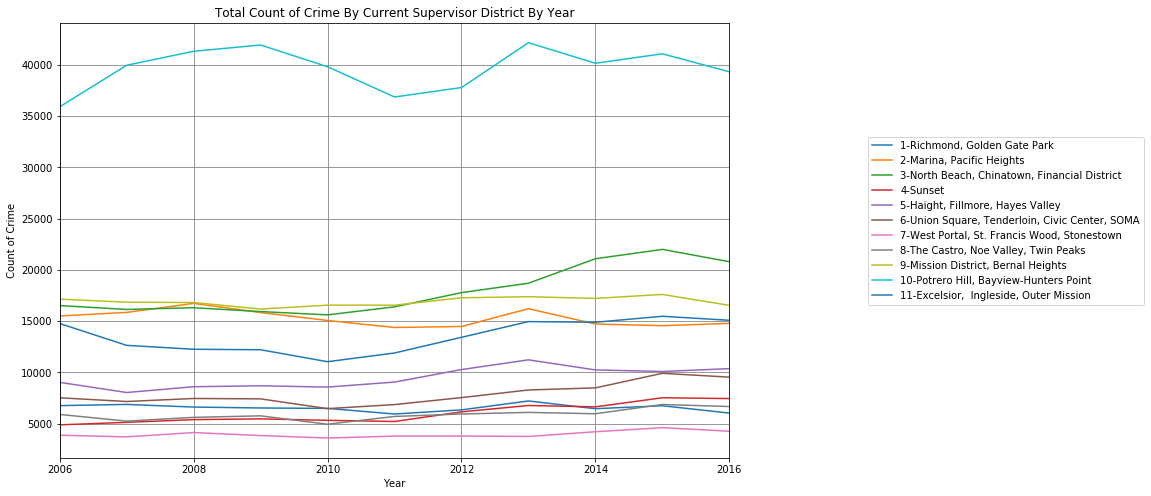

In [457]:

current_supervisor_districts = {
1  : "1-Richmond, Golden Gate Park",
2  : "2-Marina, Pacific Heights",
3  : "3-North Beach, Chinatown, Financial District",
4  : "4-Sunset",
5  : "5-Haight, Fillmore, Hayes Valley",
6  : "6-Union Square, Tenderloin, Civic Center, SOMA",
7  : "7-West Portal, St. Francis Wood, Stonestown",
8  : "8-The Castro, Noe Valley, Twin Peaks",
9  : "9-Mission District, Bernal Heights",
10 : "10-Potrero Hill, Bayview-Hunters Point",
11 : "11-Excelsior,  Ingleside, Outer Mission",
}

def major_formatter(x, pos):
    return "[%.2f]" % x
import matplotlib.pyplot as plt
ax = crime_data_district_pivot.plot(figsize=(12,8), legend = False)
plt.legend(list(current_supervisor_districts.values()),  bbox_to_anchor=(1.2, 0.75))

# Complete formatting the plot 
plt.title('Total Count of Crime By Current Supervisor District By Year')
plt.xlabel("Year")
plt.ylabel(" Count of Crime ")
plt.grid(linestyle='-', color = 'gray')

plt.show()

In [451]:
#Calculate totals by COunts by year, Supervisor District, category
crime_data_category = crime_data.loc[(crime_data["year"] >= 2006) & (crime_data["year"] <= 2016)]
crime_data_category1 = crime_data_category.groupby(["year", "category"]).agg(
    {"category" : "count" 
    })

crime_data_category1.head(40)
#crime_data_category1.to_csv('file_name.csv', sep=",")

category
year category                             
2006 ARSON                             240
     ASSAULT                         12449
     BAD CHECKS                         87
     BRIBERY                            36
     BURGLARY                         7004
     DISORDERLY CONDUCT                521
     DRIVING UNDER THE INFLUENCE       266
     DRUG/NARCOTIC                    9069
     DRUNKENNESS                       703
     EMBEZZLEMENT                      229
     EXTORTION                          49
     FAMILY OFFENSES                    89
     FORGERY/COUNTERFEITING           2306
     FRAUD                            2599
     GAMBLING                           28
     KIDNAPPING                        318
     LARCENY/THEFT                   27352
     LIQUOR LAWS                       248
     LOITERING                          96
     MISSING PERSON                   4253
     NON-CRIMINAL                    13368
     OTHER OFFENSES                  18306
     PORNOGRAPHY/OBSCENE MAT             6
     PROSTITUTION                     1290
     RECOVERED VEHICLE                1086
     ROBBERY                          4131
     RUNAWAY                           382
     SECONDARY CODES                  1375
     SEX OFFENSES, FORCIBLE            599
     SEX OFFENSES, NON FORCIBLE         29
     STOLEN PROPERTY                   575
     SUICIDE                            86
     SUSPICIOUS OCC                   4775
     TRESPASS                         1102
     VANDALISM                        7688
     VEHICLE THEFT                    7291
     WARRANTS                         6498
     WEAPON LAWS                      1324
2007 ARSON                             246
     ASSAULT                         12518

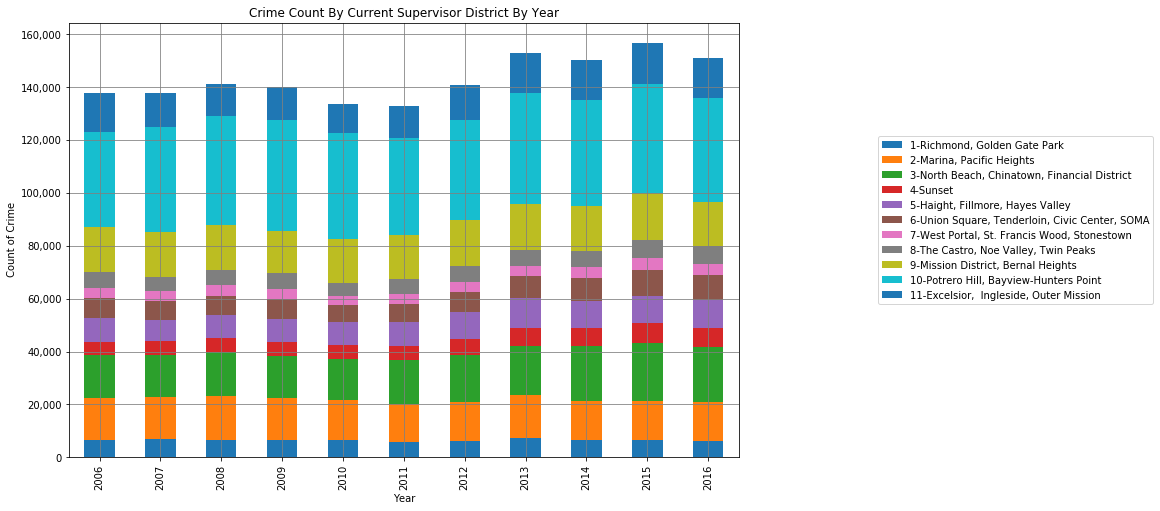

In [458]:

def major_formatter(x, pos):
    return "[%.2f]" % x
import matplotlib.pyplot as plt

ax = crime_data_district_pivot.plot.bar(stacked=True, figsize=(12,8), legend = False)
plt.legend(list(current_supervisor_districts.values()),  bbox_to_anchor=(1.2, 0.75))

# Complete formatting the plot 
plt.title( 'Crime Count By Current Supervisor District By Year')
plt.xlabel("Year")
plt.ylabel(" Count of Crime")
plt.grid(linestyle='-', color = 'gray')

ax.get_yaxis().set_major_formatter(
   plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [453]:
crime_data_top = crime_data_district2.loc[crime_data_district2['category'] > 1000,["category"]]
crime_data_top.head()
#crime_data_district2

category
year current_supervisor_districts          
2006 1                                 6761
     2                                15506
     3                                16521
     4                                 4884
     5                                 9029

In [454]:
#Calculate totals by Cunts by year, Supervisor District, by crime category 
crime_data_district2a = crime_data_district.sort_values(["year","current_supervisor_districts",'category']).groupby(["year","current_supervisor_districts",'category']).agg({"category" : "count" })


crime_data_district2a.set_axis(['category_count'],axis=1,inplace=True)
crime_data_district2a.head(20)
#crime_data_district2= pd.DataFrame(crime_data_district1.head(2000000))
#crime_data_district2.head()

category_count
year current_supervisor_districts category                                   
2006 1                            ARSON                                    17
                                  ASSAULT                                 680
                                  BAD CHECKS                                5
                                  BRIBERY                                   2
                                  BURGLARY                                192
                                  DISORDERLY CONDUCT                       14
                                  DRIVING UNDER THE INFLUENCE              15
                                  DRUG/NARCOTIC                           253
                                  DRUNKENNESS                              27
                                  EMBEZZLEMENT                             11
                                  EXTORTION                                 2
                                  FAMILY OFFENSES                           8
                                  FORGERY/COUNTERFEITING                  146
                                  FRAUD                                   116
                                  GAMBLING                                  2
                                  KIDNAPPING                               28
                                  LARCENY/THEFT                           711
                                  LIQUOR LAWS                               7
                                  LOITERING                                 3
                                  MISSING PERSON                          557

In [459]:
d1=crime_data_district_pivot2.iloc[:11,:]
d1.head()

NameError: name 'crime_data_district_pivot2' is not defined

In [460]:
#Pivot Crime data  (total count of Crime ) dataframe by Supervisor District
crime_data_district_pivot2 = crime_data_district2a.pivot_table("category_count",index=["year" ,"current_supervisor_districts"], columns=["category"] )

crime_data_district_pivot2.head(20)


category                           ARSON  ASSAULT  BAD CHECKS  BRIBERY  \
year current_supervisor_districts                                        
2006 1                             17.00   680.00        5.00     2.00   
     2                             21.00 1,510.00        9.00     9.00   
     3                             13.00 1,307.00       19.00      nan   
     4                             13.00   397.00        4.00     1.00   
     5                             11.00   791.00        8.00     5.00   
     6                             10.00   457.00        5.00     1.00   
     7                              6.00   376.00        4.00      nan   
     8                              6.00   443.00        3.00     2.00   
     9                             83.00 1,980.00        5.00    10.00   
     10                            39.00 3,364.00       18.00     3.00   
     11                            21.00 1,140.00        7.00     3.00   
2007 1                             12.00   730.00        5.00     7.00   
     2                             27.00 1,564.00        5.00     9.00   
     3                             21.00 1,322.00       16.00     3.00   
     4                             13.00   400.00        2.00     1.00   
     5                              8.00   733.00        2.00     5.00   
     6                             12.00   451.00        7.00     2.00   
     7                             11.00   364.00        5.00     4.00   
     8                             11.00   395.00        8.00     3.00   
     9                             86.00 1,971.00        8.00     8.00   

category                           BURGLARY  DISORDERLY CONDUCT  \
year current_supervisor_districts                                 
2006 1                               192.00               14.00   
     2                               448.00              128.00   
     3                             1,087.00               85.00   
     4                               268.00               11.00   
     5                               710.00               29.00   
     6                               805.00               17.00   
     7                               195.00               21.00   
     8                               353.00               21.00   
     9                               882.00               53.00   
     10                            1,087.00               80.00   
     11                              975.00               62.00   
2007 1                               189.00               14.00   
     2                               462.00              160.00   
     3                               768.00              105.00   
     4                               183.00               16.00   
     5                               351.00               36.00   
     6                               583.00               20.00   
     7                               145.00               25.00   
     8                               348.00                8.00   
     9                               878.00               44.00   

category                           DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  \
year current_supervisor_districts                                               
2006 1                                                   15.00         253.00   
     2                                                   28.00       1,698.00   
     3                                                   24.00         332.00   
     4                                                   17.00         159.00   
     5                                                   15.00         336.00   
     6                                                   25.00          94.00   
     7                                                    8.00          56.00   
     8                                                   10.00          79.00   
     9                                                   29.00         948.00   
     

The crime types that occurs the most is , and its amount is  
    Crime Category  Count_of Crime
0   OTHER OFFENSES        1,187.00
1   OTHER OFFENSES        2,825.00
2    LARCENY/THEFT        4,805.00
3    LARCENY/THEFT          970.00
4    LARCENY/THEFT        1,809.00
5    LARCENY/THEFT        2,501.00
6    LARCENY/THEFT          487.00
7    LARCENY/THEFT        1,557.00
8   OTHER OFFENSES        2,992.00
9    LARCENY/THEFT        7,705.00
10   LARCENY/THEFT        3,620.00


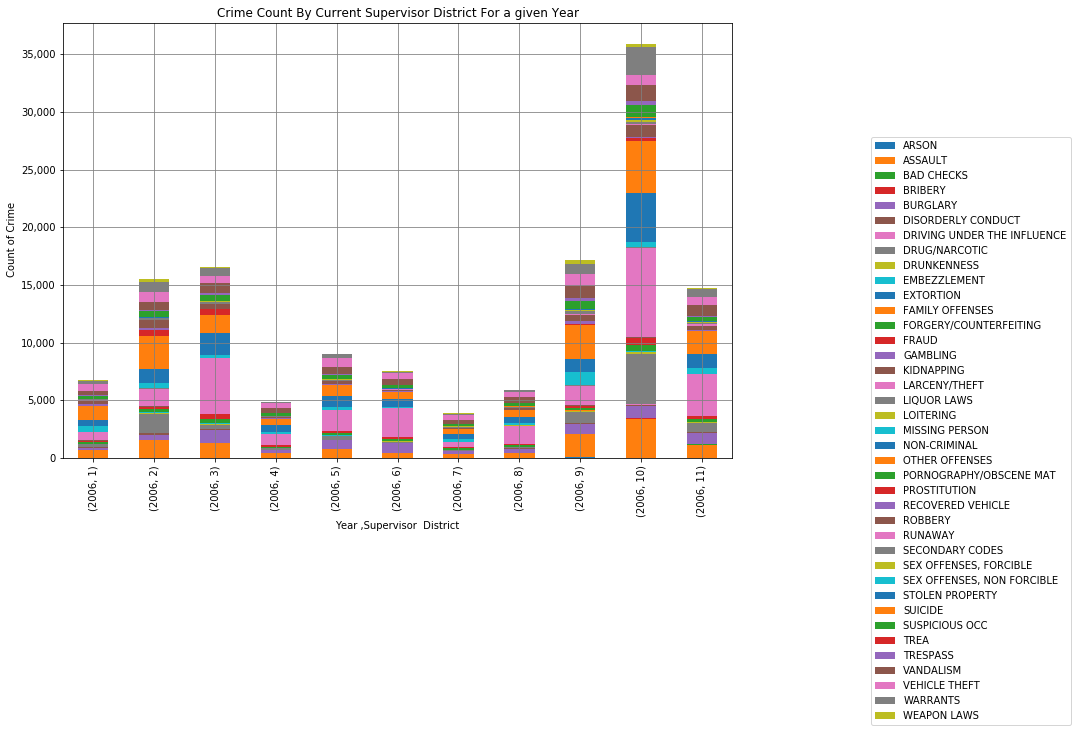

The crime types that occurs the most is , and its amount is  
    Crime Category  Count_of Crime
0   OTHER OFFENSES        1,285.00
1   OTHER OFFENSES        2,896.00
2    LARCENY/THEFT        4,860.00
3    LARCENY/THEFT          972.00
4    LARCENY/THEFT        1,559.00
5    LARCENY/THEFT        2,452.00
6    LARCENY/THEFT          516.00
7    LARCENY/THEFT        1,215.00
8   OTHER OFFENSES        2,926.00
9    LARCENY/THEFT        7,547.00
10   LARCENY/THEFT        2,830.00


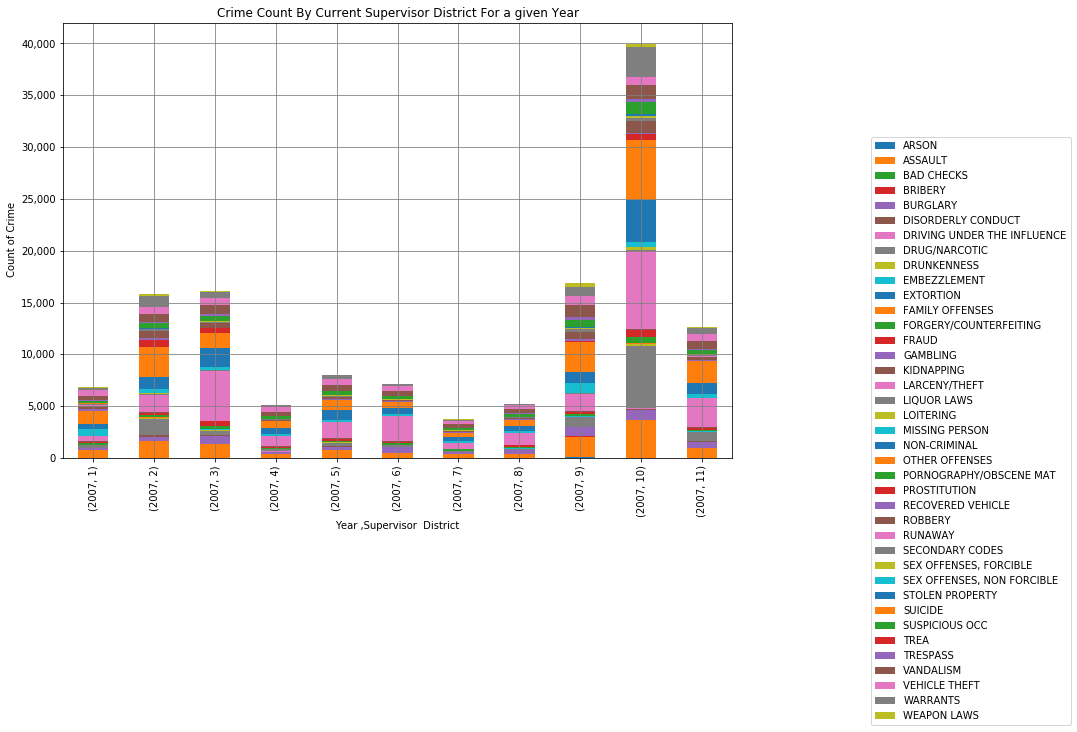

The crime types that occurs the most is , and its amount is  
    Crime Category  Count_of Crime
0   OTHER OFFENSES        1,402.00
1   OTHER OFFENSES        3,836.00
2    LARCENY/THEFT        4,953.00
3    LARCENY/THEFT        1,137.00
4    LARCENY/THEFT        1,850.00
5    LARCENY/THEFT        2,561.00
6    LARCENY/THEFT          605.00
7    LARCENY/THEFT        1,337.00
8   OTHER OFFENSES        3,128.00
9   OTHER OFFENSES        7,333.00
10   LARCENY/THEFT        2,546.00


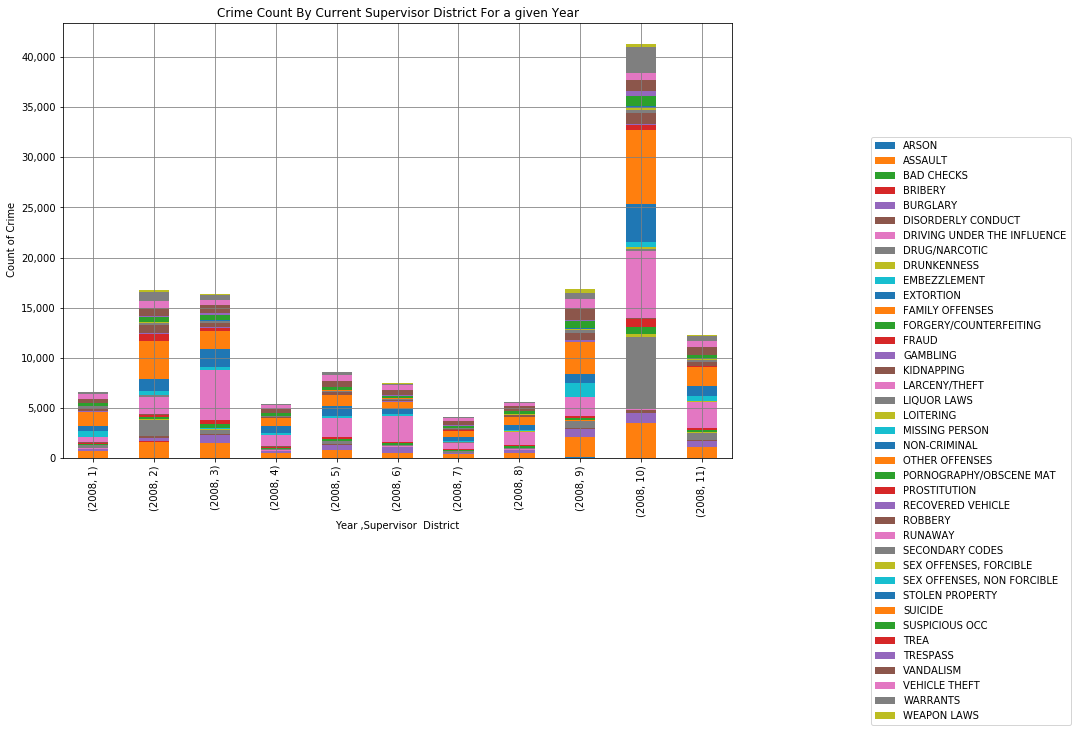

The crime types that occurs the most is , and its amount is  
    Crime Category  Count_of Crime
0   OTHER OFFENSES        1,298.00
1   OTHER OFFENSES        3,603.00
2    LARCENY/THEFT        4,775.00
3    LARCENY/THEFT        1,145.00
4    LARCENY/THEFT        1,815.00
5    LARCENY/THEFT        2,376.00
6    LARCENY/THEFT          618.00
7    LARCENY/THEFT        1,458.00
8   OTHER OFFENSES        3,336.00
9   OTHER OFFENSES        7,945.00
10   LARCENY/THEFT        2,550.00


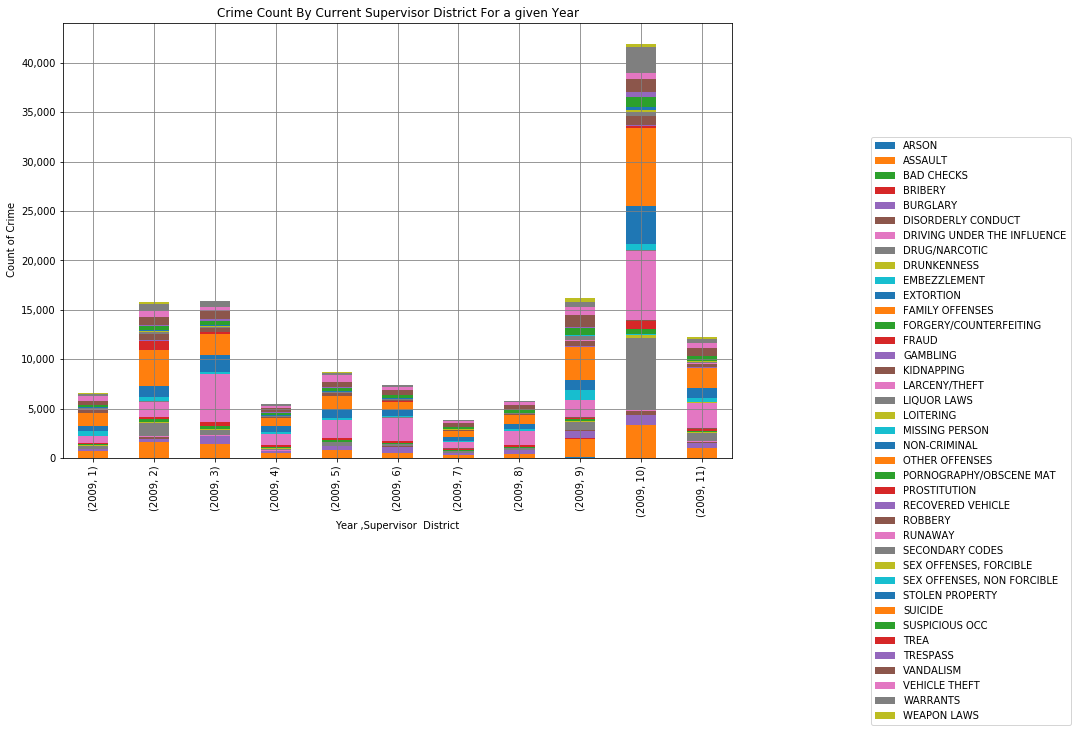

The crime types that occurs the most is , and its amount is  
    Crime Category  Count_of Crime
0   OTHER OFFENSES        1,328.00
1   OTHER OFFENSES        2,971.00
2    LARCENY/THEFT        4,290.00
3    LARCENY/THEFT          964.00
4    LARCENY/THEFT        1,974.00
5    LARCENY/THEFT        1,881.00
6   OTHER OFFENSES          518.00
7    LARCENY/THEFT        1,224.00
8   OTHER OFFENSES        3,054.00
9    LARCENY/THEFT        7,124.00
10   LARCENY/THEFT        2,185.00


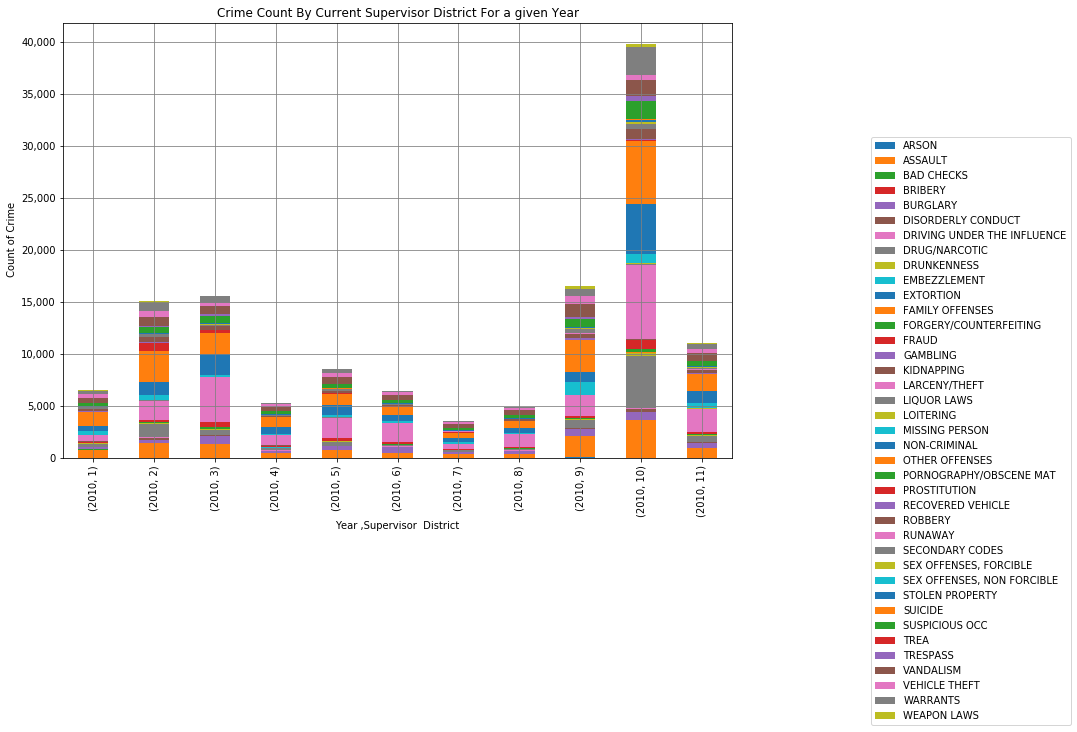

The crime types that occurs the most is , and its amount is  
    Crime Category  Count_of Crime
0   OTHER OFFENSES        1,305.00
1   OTHER OFFENSES        2,600.00
2    LARCENY/THEFT        4,626.00
3    LARCENY/THEFT          969.00
4    LARCENY/THEFT        2,157.00
5    LARCENY/THEFT        2,029.00
6    LARCENY/THEFT          584.00
7    LARCENY/THEFT        1,499.00
8   OTHER OFFENSES        2,909.00
9    LARCENY/THEFT        6,886.00
10   LARCENY/THEFT        2,638.00


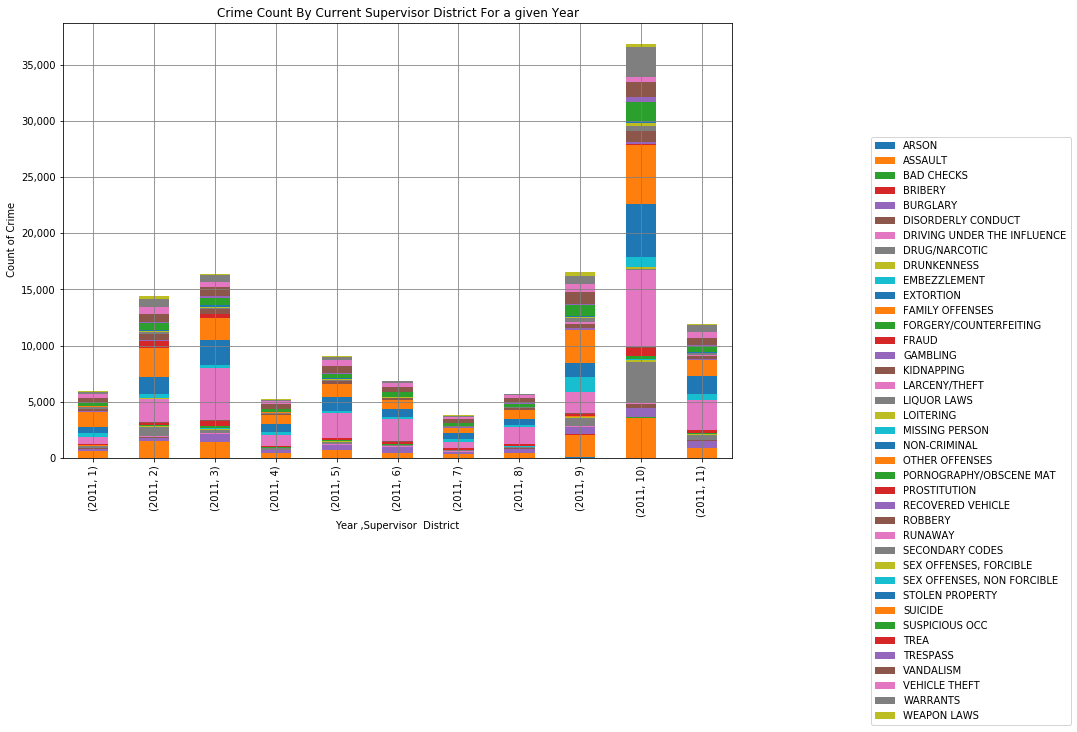

The crime types that occurs the most is , and its amount is  
    Crime Category  Count_of Crime
0   OTHER OFFENSES        1,119.00
1   OTHER OFFENSES        2,277.00
2    LARCENY/THEFT        5,392.00
3    LARCENY/THEFT        1,353.00
4    LARCENY/THEFT        2,477.00
5    LARCENY/THEFT        2,399.00
6     NON-CRIMINAL          655.00
7    LARCENY/THEFT        1,612.00
8   OTHER OFFENSES        2,919.00
9    LARCENY/THEFT        8,671.00
10   LARCENY/THEFT        3,375.00


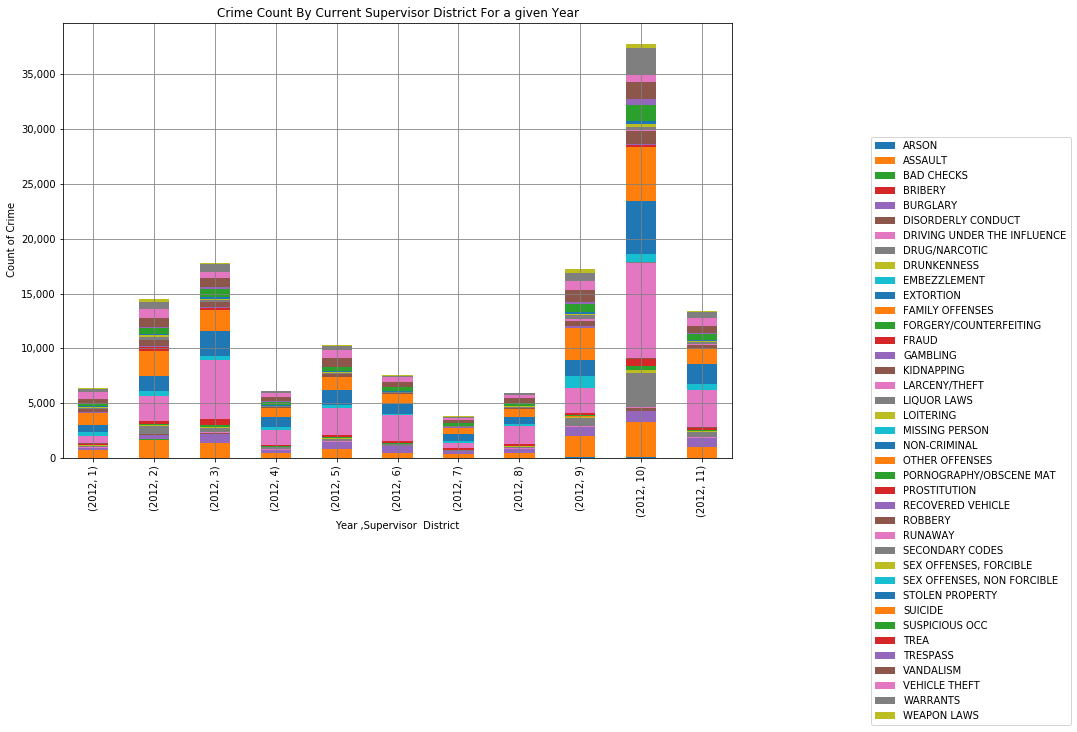

The crime types that occurs the most is , and its amount is  
    Crime Category  Count_of Crime
0   OTHER OFFENSES        1,258.00
1    LARCENY/THEFT        2,746.00
2    LARCENY/THEFT        6,015.00
3    LARCENY/THEFT        1,757.00
4    LARCENY/THEFT        2,848.00
5    LARCENY/THEFT        2,827.00
6     NON-CRIMINAL          724.00
7    LARCENY/THEFT        1,644.00
8   OTHER OFFENSES        2,887.00
9    LARCENY/THEFT       10,271.00
10   LARCENY/THEFT        4,165.00


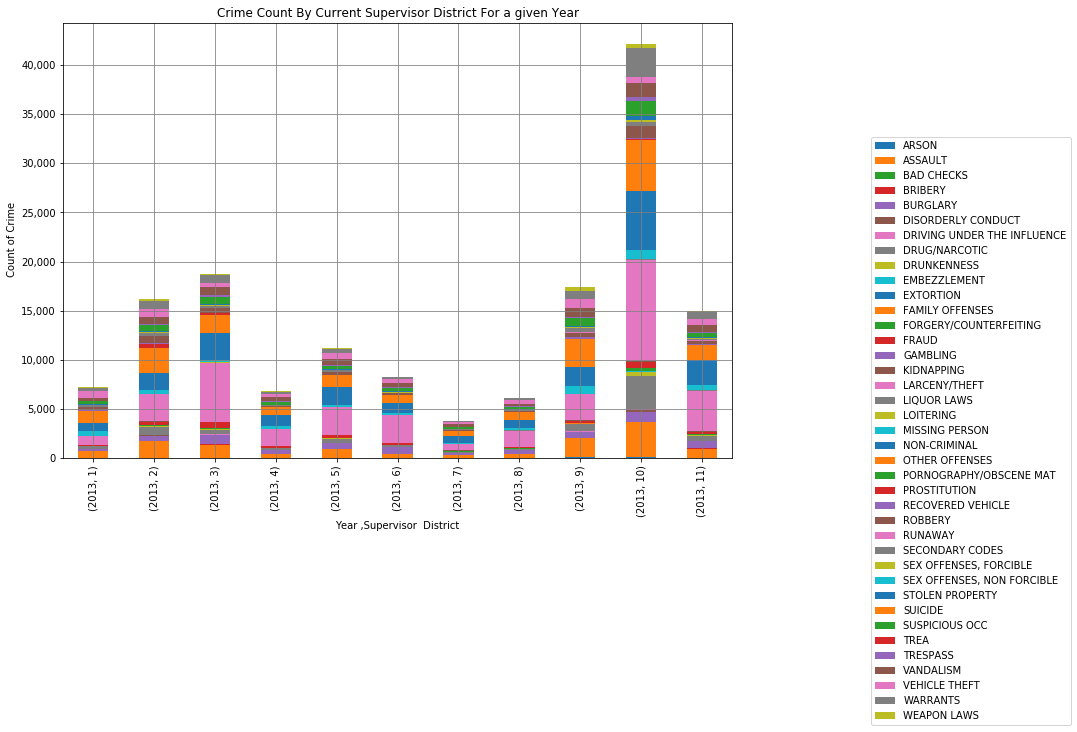

The crime types that occurs the most is , and its amount is  
    Crime Category  Count_of Crime
0   OTHER OFFENSES        1,190.00
1   OTHER OFFENSES        2,578.00
2    LARCENY/THEFT        6,955.00
3    LARCENY/THEFT        1,774.00
4    LARCENY/THEFT        2,358.00
5    LARCENY/THEFT        3,185.00
6    LARCENY/THEFT          756.00
7    LARCENY/THEFT        1,553.00
8   OTHER OFFENSES        3,022.00
9    LARCENY/THEFT       11,411.00
10   LARCENY/THEFT        4,566.00


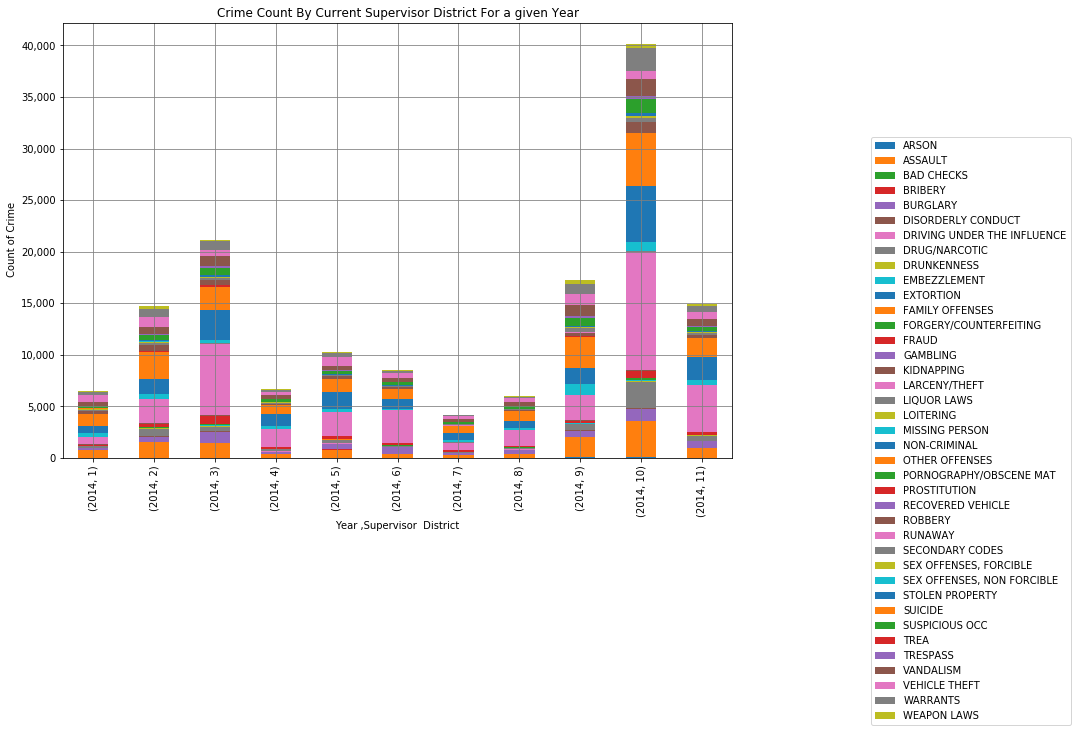

The crime types that occurs the most is , and its amount is  
    Crime Category  Count_of Crime
0   OTHER OFFENSES        1,194.00
1   OTHER OFFENSES        2,484.00
2    LARCENY/THEFT        7,922.00
3    LARCENY/THEFT        2,476.00
4    LARCENY/THEFT        1,908.00
5    LARCENY/THEFT        4,138.00
6    LARCENY/THEFT          937.00
7    LARCENY/THEFT        1,870.00
8   OTHER OFFENSES        2,983.00
9    LARCENY/THEFT       12,513.00
10   LARCENY/THEFT        5,134.00


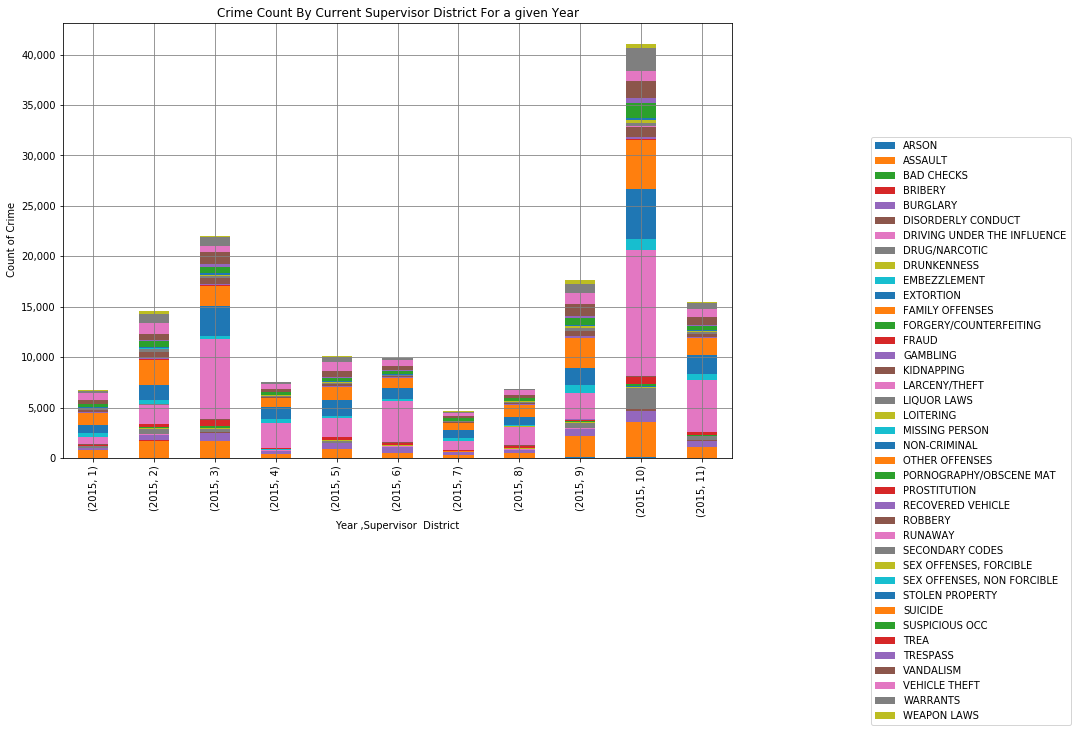

The crime types that occurs the most is , and its amount is  
    Crime Category  Count_of Crime
0   OTHER OFFENSES        1,116.00
1   OTHER OFFENSES        2,502.00
2    LARCENY/THEFT        7,543.00
3    LARCENY/THEFT        2,602.00
4    LARCENY/THEFT        2,376.00
5    LARCENY/THEFT        3,857.00
6    LARCENY/THEFT          833.00
7    LARCENY/THEFT        1,798.00
8    LARCENY/THEFT        2,693.00
9    LARCENY/THEFT       10,723.00
10   LARCENY/THEFT        5,066.00


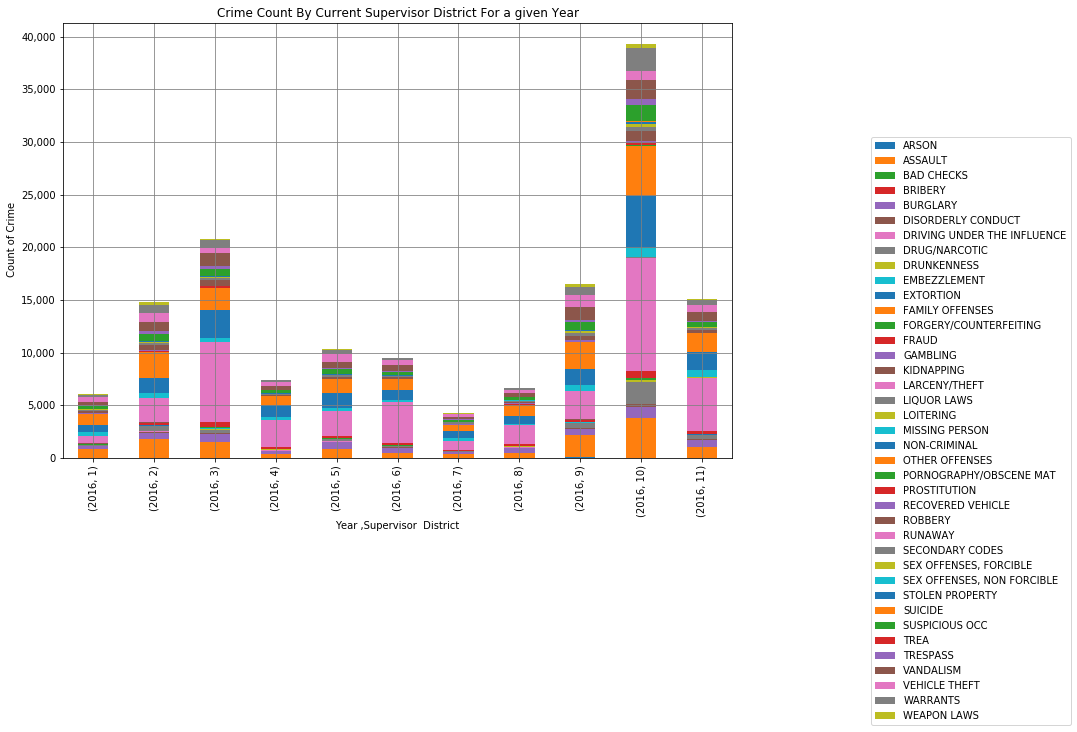

In [461]:
# Plot showing Vartion of Crime type by District for a given year 
for val in [11,22,33,44,55,66,77,88,99,110,121]:
    d1=crime_data_district_pivot2.iloc[ (val-11):val,:]
    print('The crime types that occurs the most is , and its amount is  ')
    b=d1.idxmax(axis=1).tolist()
    a=d1.max(axis=1).tolist()
    d2=pd.DataFrame ({'Crime Category':b,'Count_of Crime':a})
    #print(d1.idxmax(axis=1), '   ', d1.max(axis=1))
    print(d2)
    legend_label=sorted(crime_data.category.unique())
    ax = d1.plot.bar(stacked=True, figsize=(12,8), legend = False)
    plt.legend(legend_label,  bbox_to_anchor=(1.2, 0.75))

    # Complete formatting the plot 
    plt.title( 'Crime Count By Current Supervisor District For a given Year')
    plt.xlabel("Year ,Supervisor  District")
    plt.ylabel(" Count of Crime")
    plt.grid(linestyle='-', color = 'gray')

    ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.show()

The crime types that occurs the most is , and its amount is  


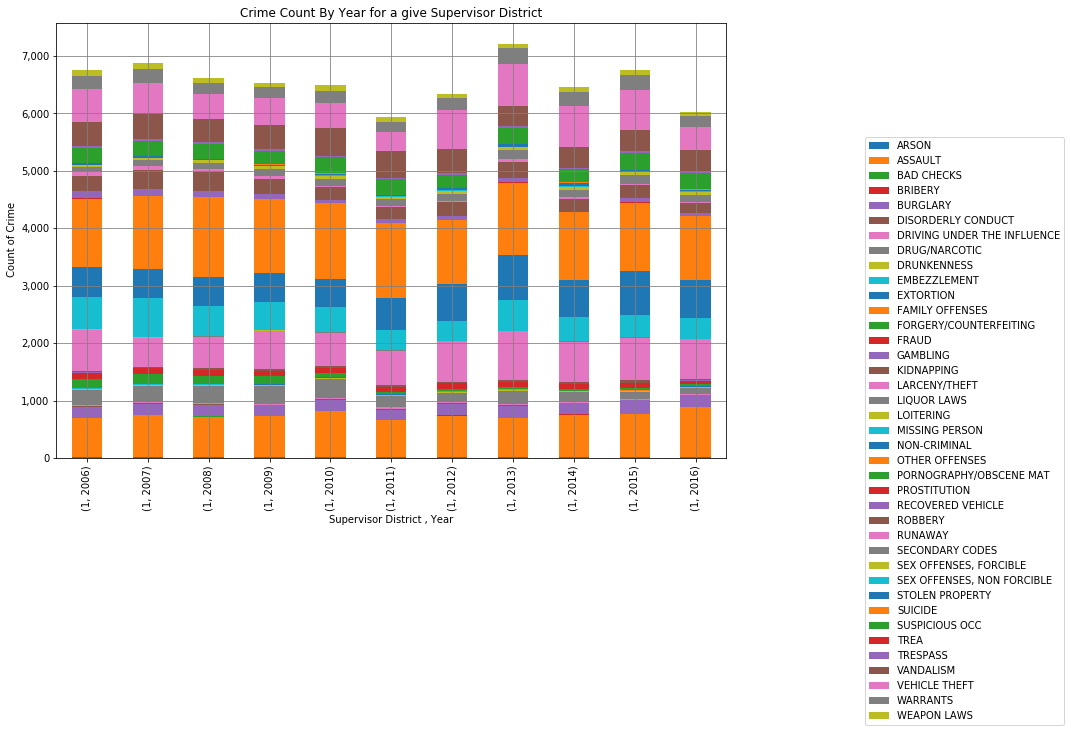

The crime types that occurs the most is , and its amount is  


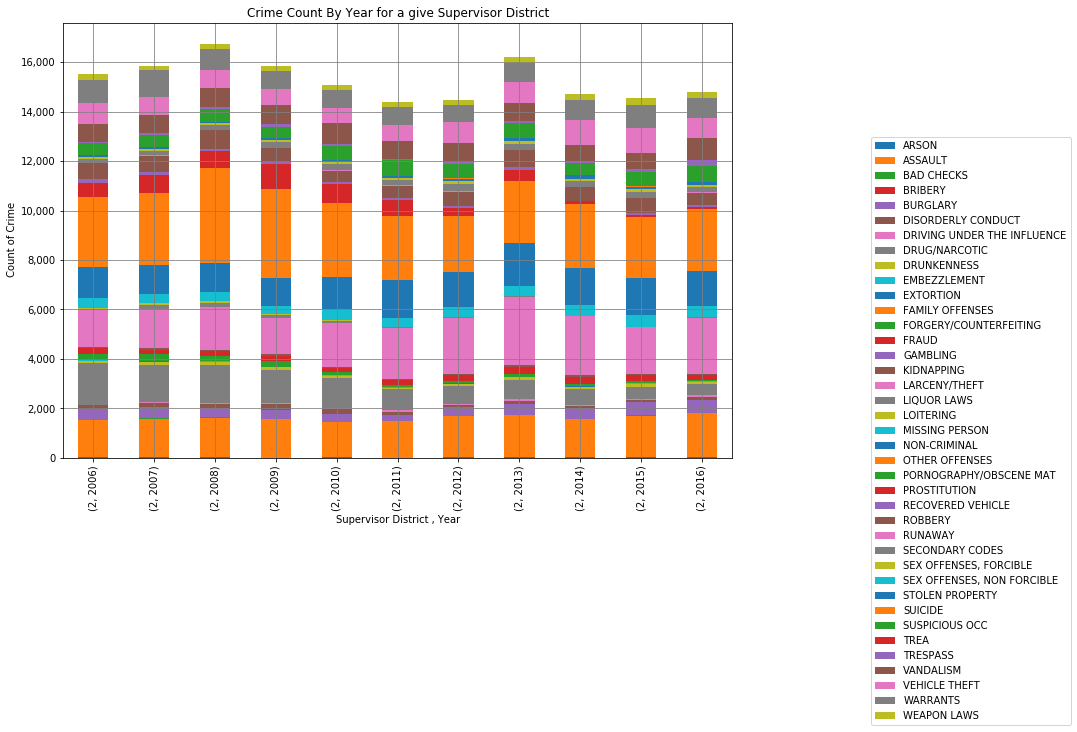

The crime types that occurs the most is , and its amount is  


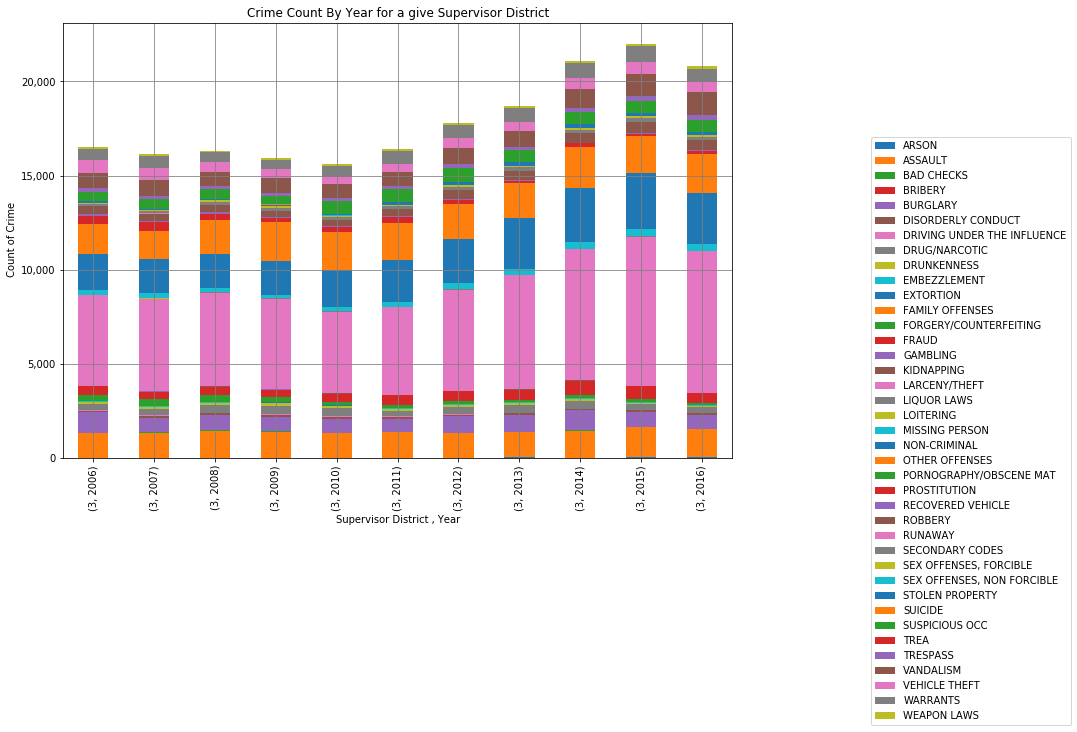

The crime types that occurs the most is , and its amount is  


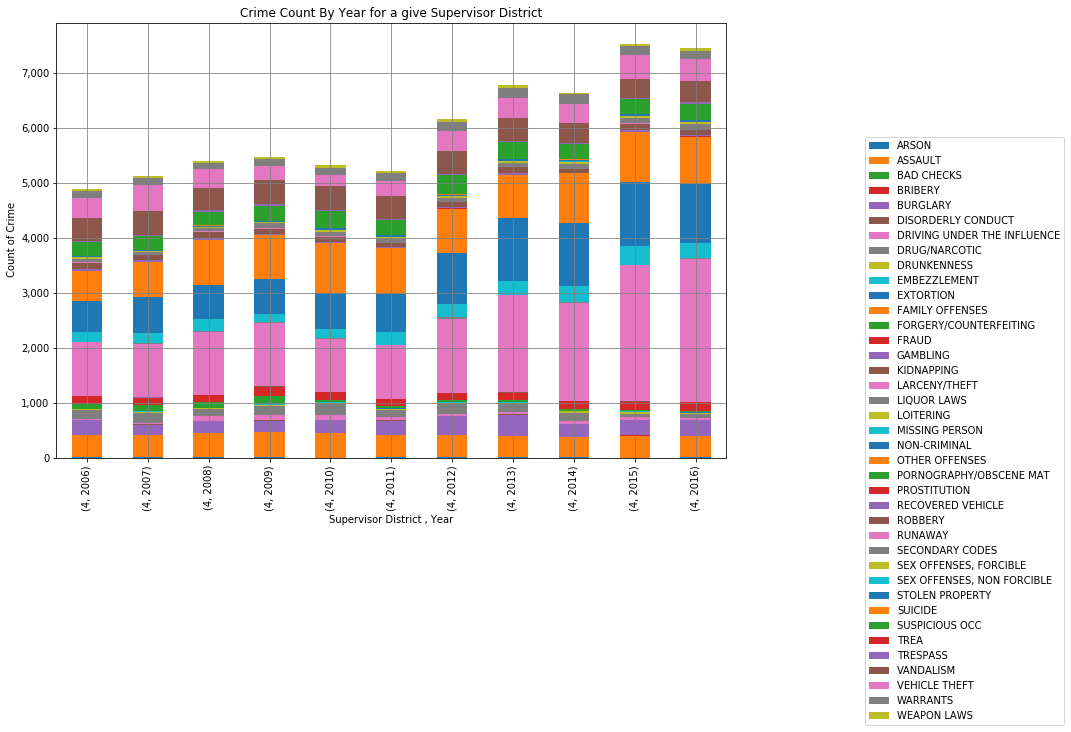

The crime types that occurs the most is , and its amount is  


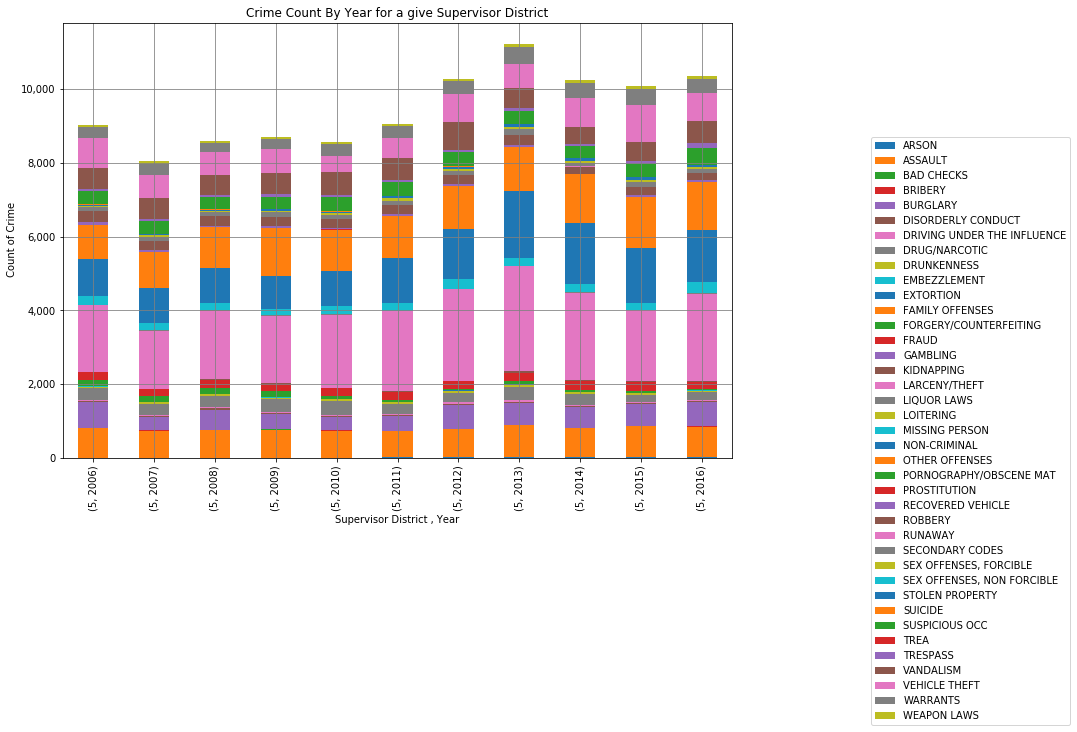

The crime types that occurs the most is , and its amount is  


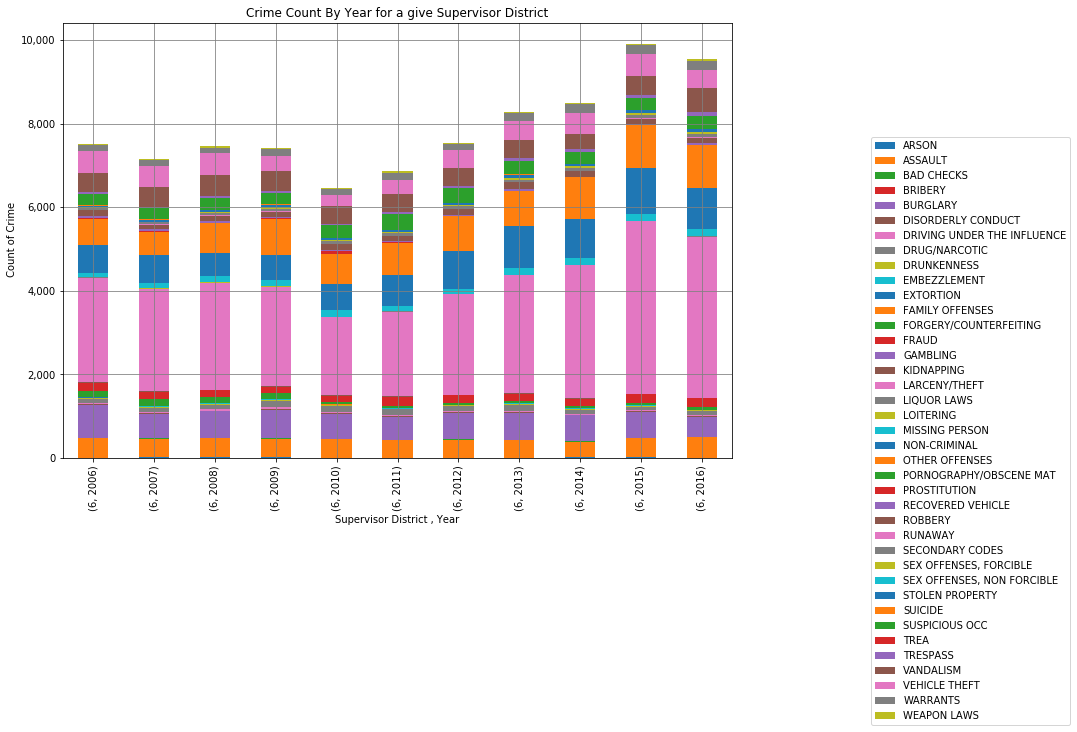

The crime types that occurs the most is , and its amount is  


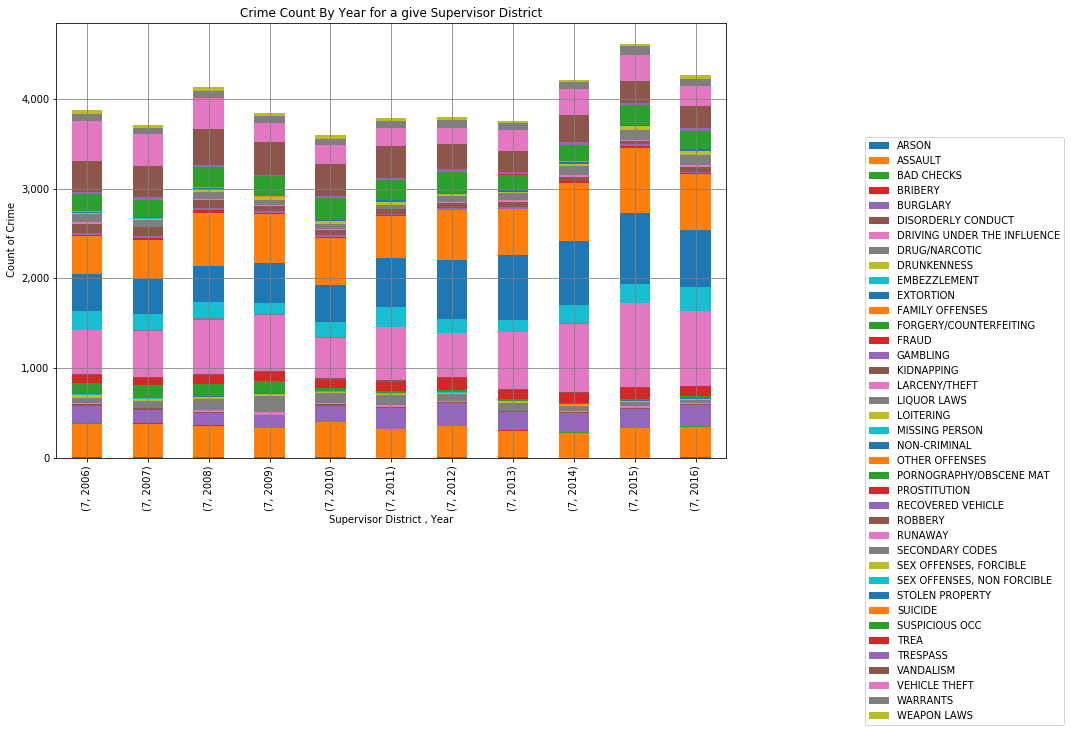

The crime types that occurs the most is , and its amount is  


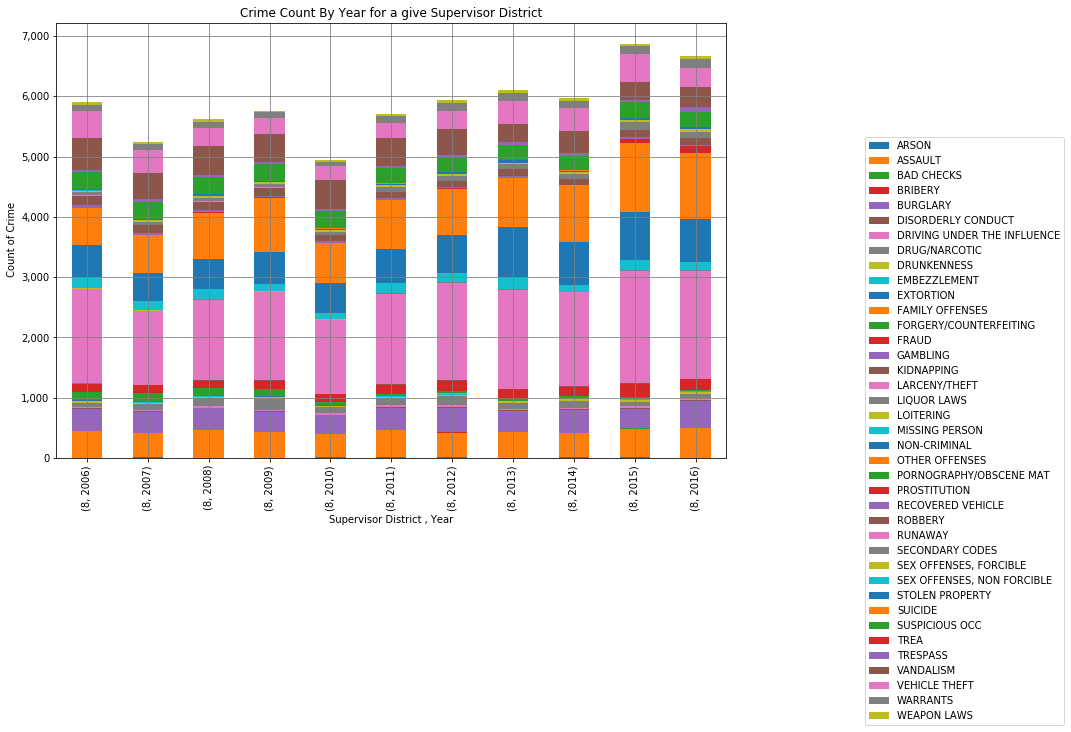

The crime types that occurs the most is , and its amount is  


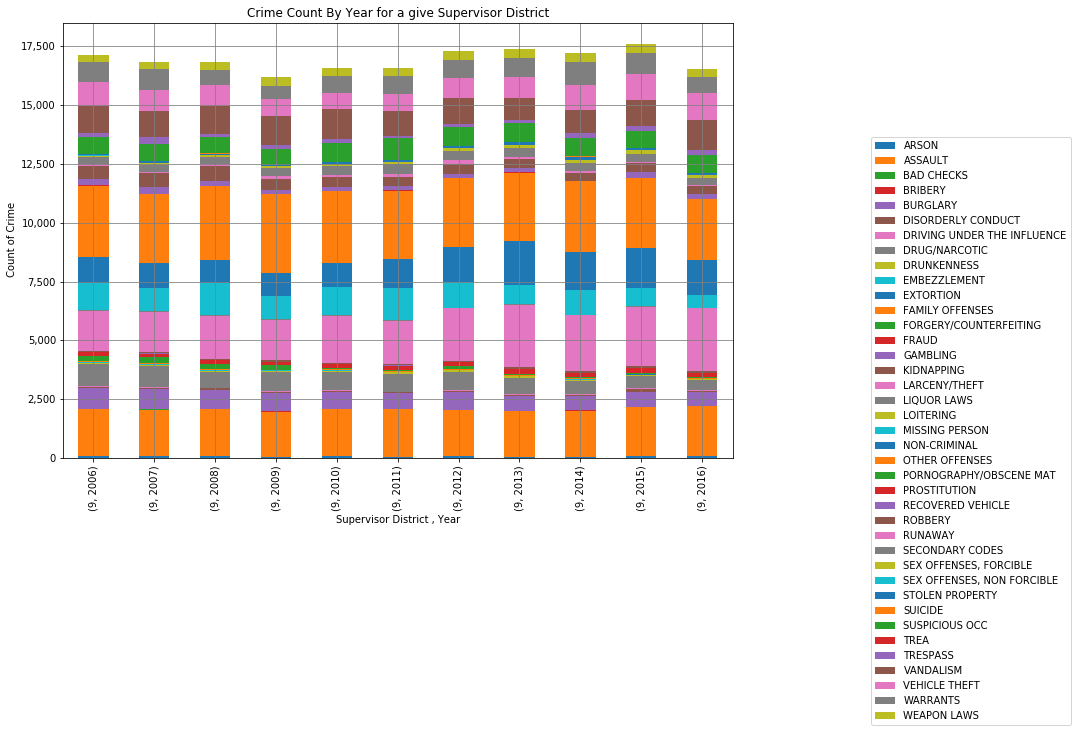

The crime types that occurs the most is , and its amount is  


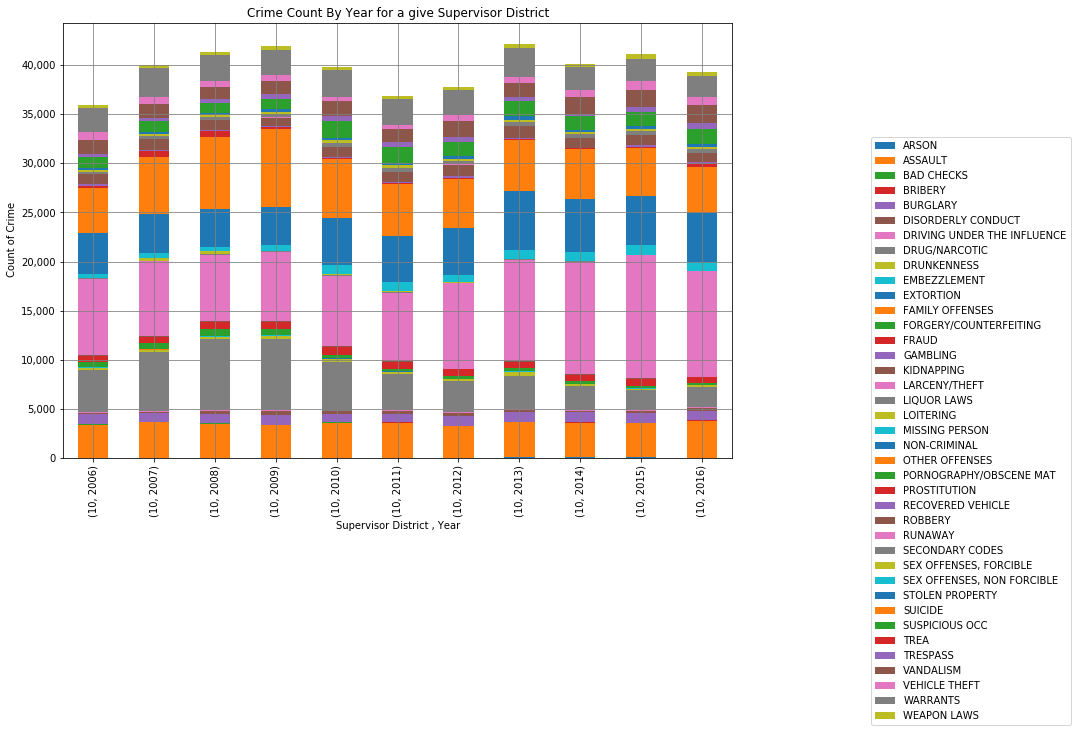

The crime types that occurs the most is , and its amount is  


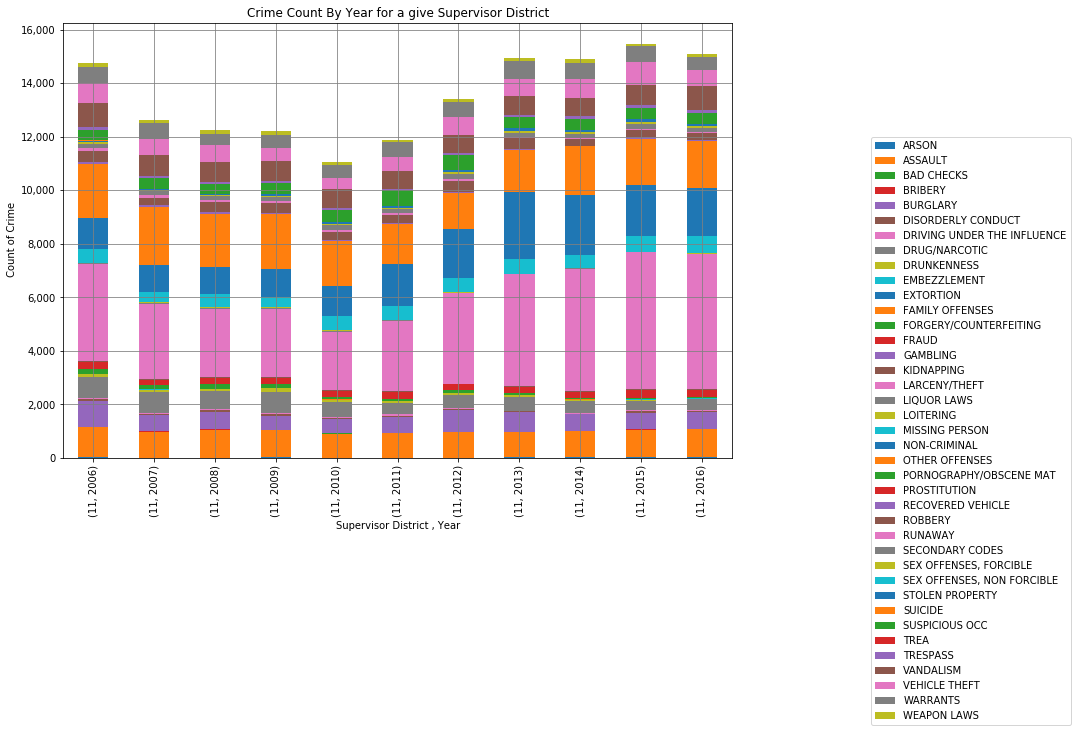

In [462]:
#Pivot Crime data  (total count of Crime ) dataframe by Supervisor District
crime_data_district_pivot3 = crime_data_district2a.pivot_table("category_count",index=["current_supervisor_districts","year" ], columns=["category"] )


# Plot showing Vartion of Crime type by year  for a given district  
for val in [11,22,33,44,55,66,77,88,99,110,121]:
    d1=crime_data_district_pivot3.iloc[ (val-11):val,:]
    
    print('The crime types that occurs the most is , and its amount is  ')
    b=d1.idxmax(axis=1).tolist()
    a=d1.max(axis=1).tolist()
    d2=pd.DataFrame ({'Crime Category':b,'Count_of Crime':a})
    legend_label=sorted(crime_data.category.unique())
    ax = d1.plot.bar(stacked=True, figsize=(12,8), legend = False)
    plt.legend(legend_label,  bbox_to_anchor=(1.2, 0.75))

    # Complete formatting the plot 
    plt.title( 'Crime Count By Year for a give Supervisor District')
    plt.xlabel("Supervisor District , Year")
    plt.ylabel(" Count of Crime")
    plt.grid(linestyle='-', color = 'gray')

    ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.show()